## Jeremy Kazimer
### 5018-1732
### Assignment #5

---

#### _Import Statements_

As always, import statements are necessary:

In [1]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

#### _1D Simulation_

In a one-dimensional random walk, the general premise is that the person starts at the origin.  Then, if viewed on a Cartesian set of axes, the person is always moving forward one step along the y-axis.  However, at each step they can either move to the left, right, or stay in their current location.  This is encoded by:

In [2]:
choices = [-1, 0, 1]

We define the `choices` as this because we only allow them to move in multiples of $1$.  Of course, in the real world, a person's stride is variant depending on a variety of factors.  However, for the purposes of simplicity, it will be kept this way.  A simple 1D simulation can be seen below:

In [3]:
'''
    dims -> the number of dimensions.
    n_walkers -> the number of iterations.
    n_steps -> the number of steps each walker will take.
'''

dims = 1
n_walkers = 10
n_steps = 500

We also have to define a shape for an array so that each step can be recorded:

In [4]:
steps = choice(a = choices, size = (n_walkers, n_steps, dims))

And then we take the cumulative sum, since this will give us the distance from the origin at any step:

In [5]:
distance_traveled = steps.cumsum(axis = 1)

Of course, what is a Jupyter notebook without its plots? Nothing!

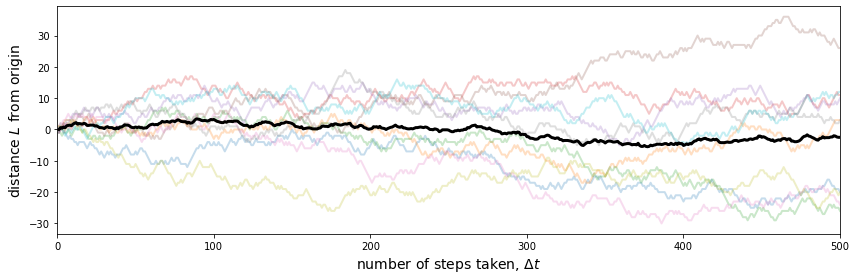

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))

L = distance_traveled.mean(axis = 0).mean(axis = 1)
dt = np.arange(n_steps) + 1

ax.plot(dt, distance_traveled[:,:,0].T, lw = 2, alpha = 0.25);
ax.plot(dt, L, lw = 3, c = 'black')

ax.set_xlim(0, n_steps)

ax.set_ylabel('distance $L$ from origin', fontsize = 14)
ax.set_xlabel(r'number of steps taken, $\Delta t$', fontsize = 14)

fig.tight_layout()

Note that the faded lines represent each individual walker, whereas the black line represents the average of those walkers.

This is effectively a [Markov Chain Monte Carlo](https://www.cs.cornell.edu/selman/cs475/lectures/intro-mcmc-lukas.pdf) simulation; basically, a random process - choosing which direction to walk - is done $N$ times to observe some greater phenomena.  This is the [Monte Carlo](https://www.investopedia.com/terms/m/montecarlosimulation.asp) portion.  The [Markov Chain](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/markov-chain) aspect is then that the walker is transitioning from one 'state' to another, where the state is said walker's location.  This is a probabilistic process as well.  However, each option in our simulation has equal probability.  

Note that this can easily be generalized to higher dimensions, which we can do as a function.  However, instead of viewing each individual walk, we'll only look at the average from this point forward:

In [7]:
def random_walk(n_steps, n_walkers, choices, dims):
    steps = choice(a = choices, size = (n_walkers, n_steps, dims))
    distance_traveled = steps.cumsum(axis = 1)
    return distance_traveled

#### _2D Simulation_

Now, suppose the same person from the previous section can now move in another direction.  Say, the $z$ axis.  The analogy falls apart here, since a person cannot just levitate.  Oftentimes, random walks generalize to particle motion for higher motion because of this fallacy.  Regardless, we can observe the individual components below:

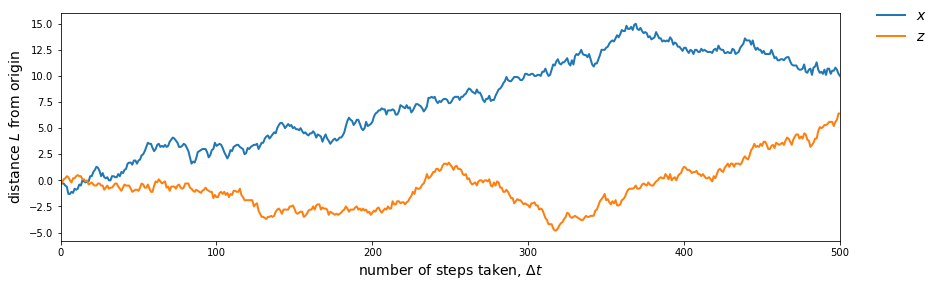

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))

L_2D = random_walk(n_steps, n_walkers, choices, 2).mean(axis = 0)
dt = np.arange(n_steps) + 1

ax.plot(dt, L_2D, lw = 2)

ax.set_xlim(0, n_steps)

ax.set_ylabel('distance $L$ from origin', fontsize = 14)
ax.set_xlabel(r'number of steps taken, $\Delta t$', fontsize = 14)

fig.legend((r'$x$', r'$z$'), fontsize = 14, loc = 'lower left', frameon = False, bbox_to_anchor = [1.00, 0.8])

fig.tight_layout()

Since their motions are independent of each other, it is anticipated that they'll have similar form.  Now, if it were dependent on each other then this function would look different.  The same can be said for 3D motion:

#### _3D Simulation_

3D motion in space is really analoguous to a particle moving freely, since, once again, humans cannot attain such a motion without extremely high and lethal velocity.  As such, we can simulate it normally:

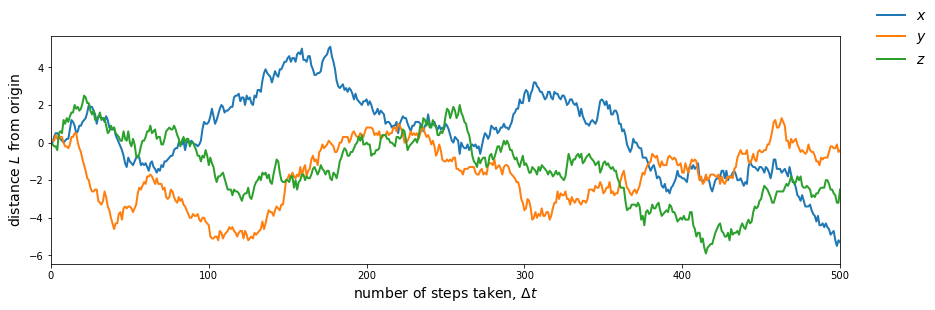

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))

L_3D = random_walk(n_steps, n_walkers, choices, 3).mean(axis = 0)
dt = np.arange(n_steps) + 1

ax.plot(dt, L_3D, lw = 2)

ax.set_xlim(0, n_steps)

ax.set_ylabel('distance $L$ from origin', fontsize = 14)
ax.set_xlabel(r'number of steps taken, $\Delta t$', fontsize = 14)

fig.legend((r'$x$', r'$y$', r'$z$'), fontsize = 14, loc = 'lower left', frameon = False, bbox_to_anchor = [1.00, 0.8])

fig.tight_layout()

Nothing surprising, honestly.

In [37]:
D = L**2/(2*n_steps)

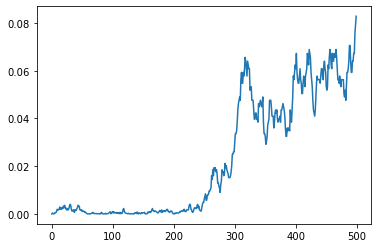

In [38]:
plt.plot(D)

https://web.stanford.edu/class/archive/cs/cs279/cs279.1172/lectures/lecture10.pdf

In [13]:
x2 = np.average( L_2D**2, axis=1)

In [18]:
x2 = np.average( L_2D**2, axis=1 )
x4 = np.average( L_2D**4, axis=1 )
sigma2_nd = np.sqrt( x4 - x2**2 )
sigma2 = np.sum( sigma2_nd, axis=0 )

<ipython-input-18-534b03445b94>:3: RuntimeWarning: invalid value encountered in sqrt
  sigma2_nd = np.sqrt( x4 - x2**2 )


In [19]:
sigma2

nan

In [27]:
np.average(random_walk(n_steps, n_walkers, choices, 1)**2, axis = 1).mean()

209.18340000000003